Accuracy =  0.8933333333333333
Accuracy using GMM =  0.9666666666666667


Text(0, 0.5, 'Petal Width')

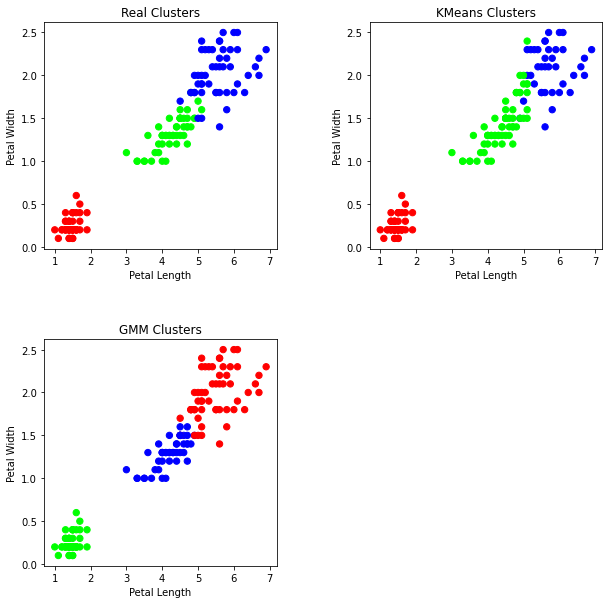

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

%matplotlib inline

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Build the KMeans Model
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

from scipy.stats import mode
labels = np.zeros_like(clusters)

for i in range(3):
    cat = (clusters == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = accuracy_score(iris.target, labels)
print('Accuracy = ', acc)

plt.figure(figsize=(10, 10))
colormap = np.array(['red', 'lime', 'blue'])

# Plot the Original Classifications using Petal features
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plot KMeans Model Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[labels], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# General EM for GMM
from sklearn import preprocessing

# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

xs = pd.DataFrame(scaled_X, columns = X.columns)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm_y = gmm.fit_predict(xs)

labels = np.zeros_like(clusters)

for i in range(3):
    cat = (gmm_y == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = accuracy_score(iris.target, labels)
print("Accuracy using GMM = ", acc)

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[gmm_y], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')